# Notebook for Metalign Data Analysis

----

Quick Notes:
| superkingdom   | ID    |
| ---------------| ------|
| Bacteria       | 2     |
| Fungi          | 4751  |
| Viruses        | 10239 |
| Archaea        | 2157  |
| Eukaryota      | 2759  |

Regular imports

In [1]:
from src.metalign_analysis import Metalign as DB
import seaborn as sns

Provide the file path to the Metalign data and initialize the class.
This attempts to set up the database if it hasn't already been created

In [2]:
leaves = "data/Leaf_all.nostrain.txt"
db = DB(leaves)

Start time: 2025-05-20 11:17:11.226523
End time: 2025-05-20 11:17:17.708289
Total runtime: 0:00:06.481766


If metadata is available, add it to the class initialized. If using the samples template file submitted to Cornell's slims website, then you can add extra columns that represent categories to the template file. You can pass the names of the other categorical variables (columns) you want as arguments

In [3]:
metadata_file = "data/leaf_phenotype.csv"
db.get_metadata(metadata_file, categories=['samples', 'site', 'treatment_herb_level'], sep=',', index_col='samples')

,site,treatment_herb_level
samples,,
A01,sky,2
B01,sky,1
C01,sky,1
D01,sky,1
E01,sky,3
...,...,...
D09,mea,3
E09,mea,3
F09,mea,3


***

## Calculate Diversity Metrics

- For either alpha or beta diversity, you have the liberty to specify which metric has to be used for the computation

Calculate alpha diversity


In [4]:
alpha_div = db.get_alpha_diversity("shannon")
print(f"Alpha diversity for all samples: \n{list(alpha_div)}")

Alpha diversity for all samples: 
[6.045493839848552, 5.381461033513849, 5.76256378195856, 4.0969323070697135, 3.655716043583581, 1.726243775582251, 5.952639037487862, 2.8086256959492766, 6.09101927930816, 3.9659995868239823, 5.40698937389306, 2.3446551941875313, 5.698718611808337, 6.070711262912674, 5.693525527855223, 3.1199488678596357, 5.2226934300053856, 4.474885771127422, 4.177536859981846, 3.6790843870397576, 5.872346624739462, 5.3648553645975605, 5.059887001541241, 2.8578564917021776, 4.578736368505116, 6.34184653147855, 4.916851247258011, 3.719500141862477, 5.5841694722720305, 6.204402995895263, 6.151996824929812, 5.928086359522647, 2.6169966076126117, 4.55132713943949, 1.862714076881129, 6.359225018984016, 6.2711290400520365, 6.068646961416925, 1.8071348422477391, 6.151995541663018, 3.0958280992242857, 5.988547335911338, 5.848935710511046, 6.358539552614152, 3.5238513037086134, 3.9363027851078574, 3.479957851189708, 6.336970443602238, 4.812354245931131, 5.406063829136025, 2.74

Calculate beta diversity

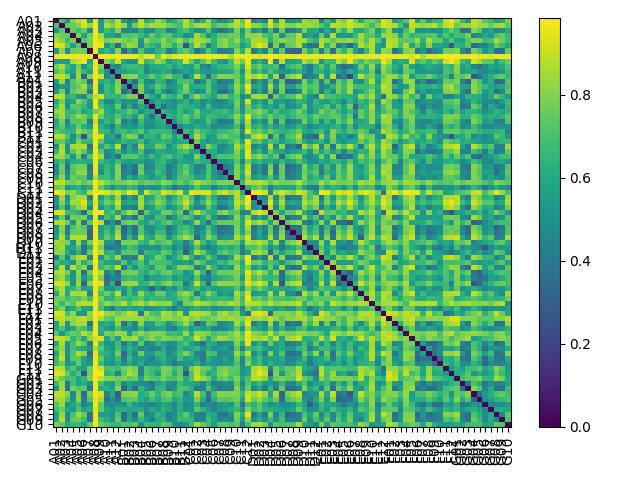

In [5]:
beta_diversity = db.get_beta_diversity()
# beta_diversity.to_data_frame().head()
beta_diversity

## Display taxa-level information for samples

This returns individual records based on the taxa. If __`sample_id`__ is not specified, each will return a dataframe of all individuals for each sample and their relative abundance. The output is sorted in descending order of relative abundance.

In [6]:
all_species = db.get_all_species(superkingdom_id=2)
all_species

,species_id,species_name,relative_abundance,sample_id
0,1605838,Pseudomonas coleopterorum,3.21395,A02
1,1605838,Pseudomonas coleopterorum,2.26881,A09
2,1906742,Microbacterium sp. BH-3-3-3,1.57361,D02
3,1605838,Pseudomonas coleopterorum,1.42981,F04
4,1605838,Pseudomonas coleopterorum,1.01307,B02
...,...,...,...,...
154567,915471,Pseudomonas linyingensis,0.00010,G10
154568,1751969,Pseudomonas sp. 382,0.00010,G10
154569,1566202,Pseudomonas sp. NFACC44-2,0.00010,G10
154570,2058891,Arthrobacter sp. B0490,0.00010,G10


In [7]:
all_genus = db.get_all_genus()
all_genus

,genus_name,genus_id,sample_id,relative_abundance
0,Pseudomonas,286,A02,15.24638
1,Kp15virus,1985328,A08,9.76294
2,Pseudomonas,286,A09,9.42714
3,Pseudomonas,286,F04,8.97113
4,Pseudomonas,286,E10,7.11968
...,...,...,...,...
39009,Kockovaella,4998,B02,0.00010
39010,Sulfurisoma,1499082,E07,0.00010
39011,Dechloromonas,73029,F06,0.00010
39012,Azonexus,146936,G02,0.00010


In [8]:
all_family = db.get_all_family("A02")

In [9]:
all_orders = db.get_all_order()

In [10]:
all_class = db.get_all_class("A02")

In [11]:
all_phyla = db.get_all_phyla()
all_phyla.superkingdom_id.unique()

array([    2, 10239,  2759,  2157], dtype=int64)

`-222` represents an individual with unknown kingdom id

In [12]:
all_phyla[all_phyla["superkingdom_id"] == -2222]

,phylum_name,phylum_id,superkingdom_id,sample_id,relative_abundance


## Data Visualization

### Stacked columns

This plots a bar chart, showing the relative abundance of the top `subset` phyla in the sample specified

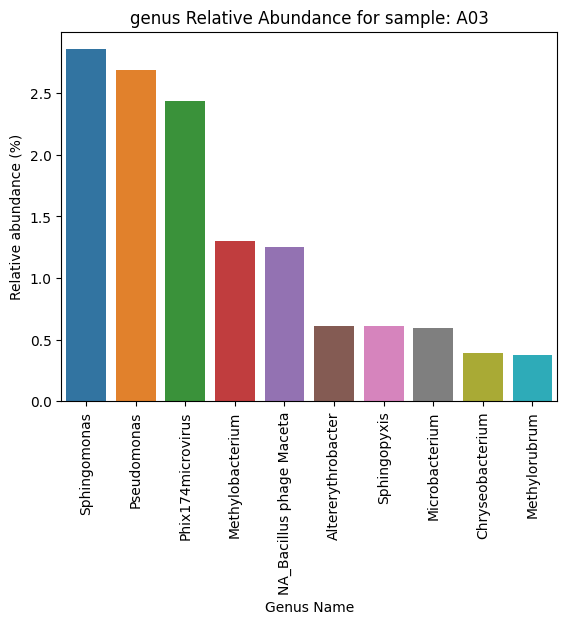

In [29]:
db.barplot_by_sample("A03", "genus", 10)

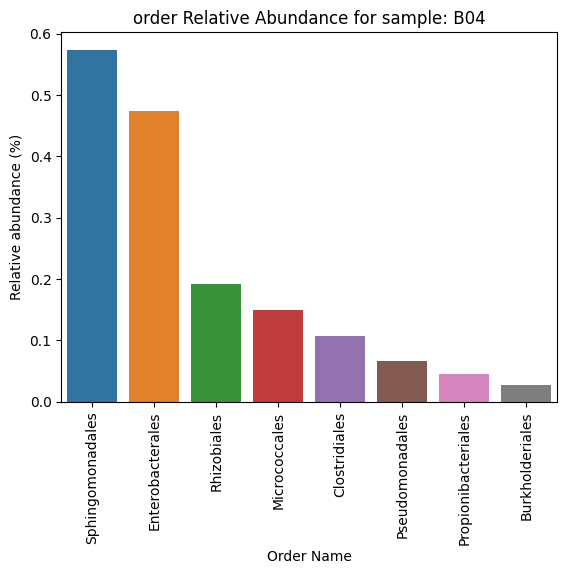

In [30]:
db.barplot_by_sample('B04', 'order', 8, superkingdom_id=2)

Make a stacked barplot showing the relative abundances of all samples (or samples specified)

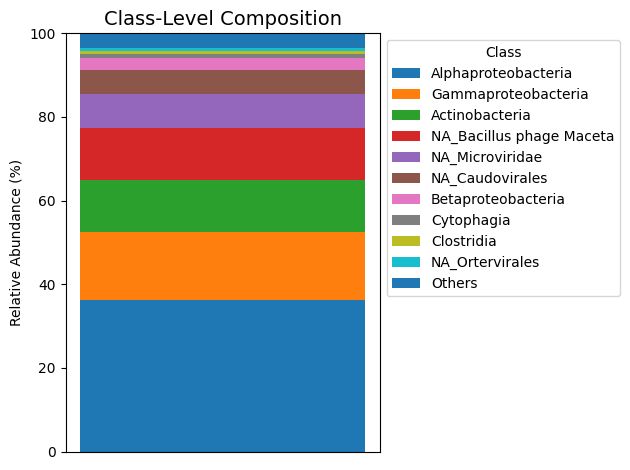

In [34]:
db.taxa_level_barplot(level='class', top_n=10)

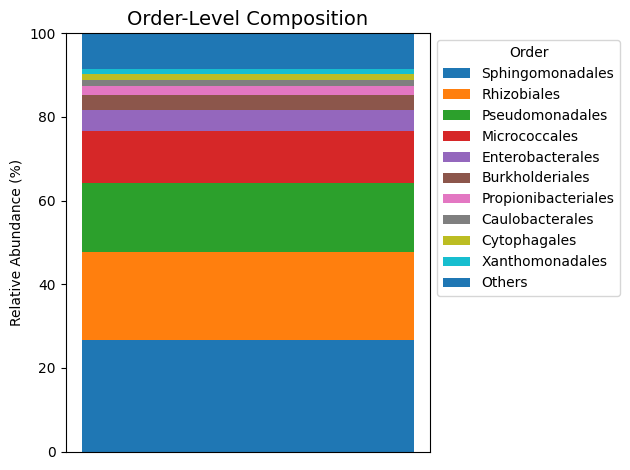

In [38]:
db.taxa_level_barplot(level='order', color_palette='tab10', top_n=10, superkingdom_id=2)

Stacked barplot of all class taxa in samples "A01" and "A02"

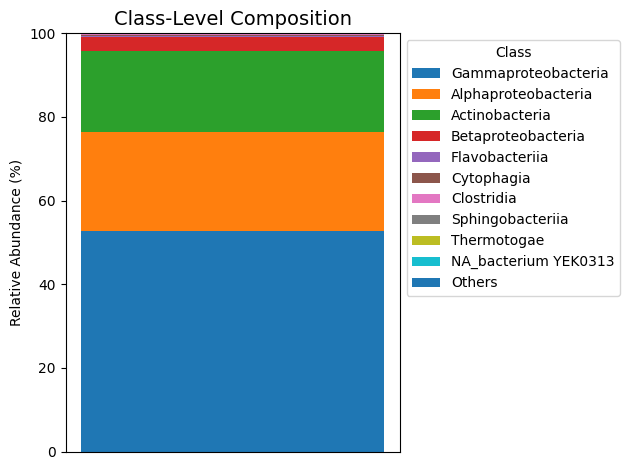

In [42]:
db.taxa_level_barplot(level='class', top_n=10, color_palette="tab10", choose_samples=["A01", "A02"], superkingdom_id=2)

## Principal Coordinate Analysis Plot

Show PCoA of samples and color by category (complex)

c:\Users\eopoku\AppData\Local\Programs\Python\Python313\Lib\site-packages\skbio\stats\ordination\_principal_coordinate_analysis.py:214: RuntimeWarning: The result contains negative eigenvalues that are large in magnitude, which may suggest result inaccuracy. See Notes for details. The negative-most eigenvalue is -0.13372741069889788 whereas the largest positive one is 5.0314545632125585.
  warn(


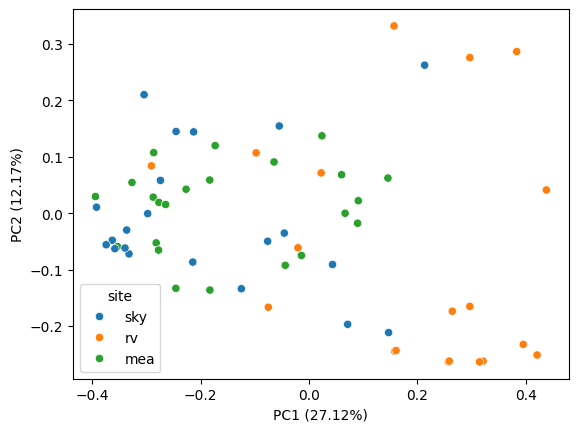

In [48]:
fig = db.plot_pcoa(dissimilarity_metric='braycurtis', color_by="site", method='eigh')

Save pcoa dimensions to file

In [58]:
umapDB = db.plot_UMAP(color_by='site', metric='braycurtis')
umapDB

c:\Users\eopoku\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
c:\Users\eopoku\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,UMAP1,UMAP2,site,treatment_herb_level
A01,13.144573,4.339209,sky,2.0
A02,12.445374,3.471893,sky,2.0
A03,12.290310,4.551105,sky,0.0
A04,7.773130,3.329509,rv,3.0
A05,9.334126,1.744196,rv,0.0
...,...,...,...,...
G06,9.627084,4.288326,mea,3.0
G07,9.960505,3.566720,mea,3.0
G08,12.105598,5.281852,mea,0.0
G09,12.343475,6.256184,mea,2.0


<Axes: xlabel='UMAP1', ylabel='UMAP2'>

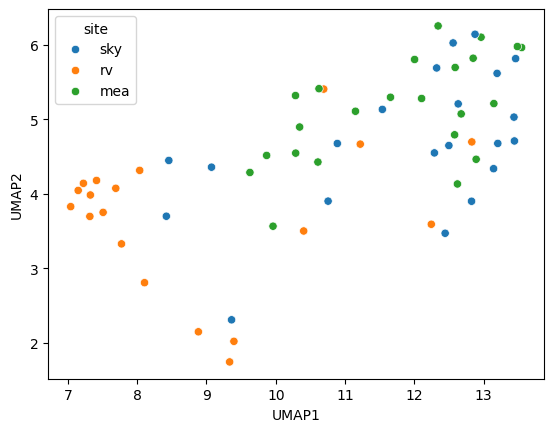

In [59]:
sns.scatterplot(umapDB, x='UMAP1', y='UMAP2', hue='site')

Save principal coordinate components to output

In [ ]:
# db.save_pcoa_dimensions("pcoa_output.csv", sep=',')

## SPECIES ACCUMULATION CURVE

Still working on it

c:\Users\eopoku\OneDrive - William & Mary\Documents\projects\process-metalign\src\diversity_stats\calc_stats.py:109: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sample_names, rotation=90)


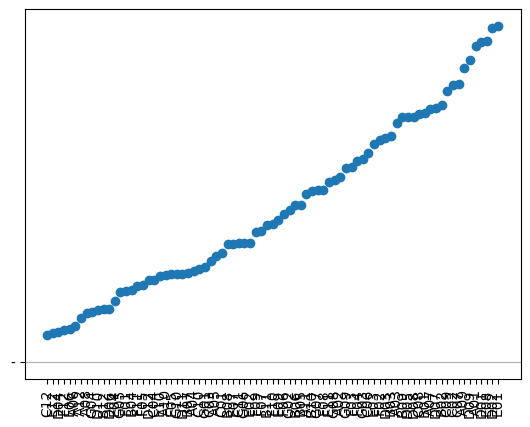

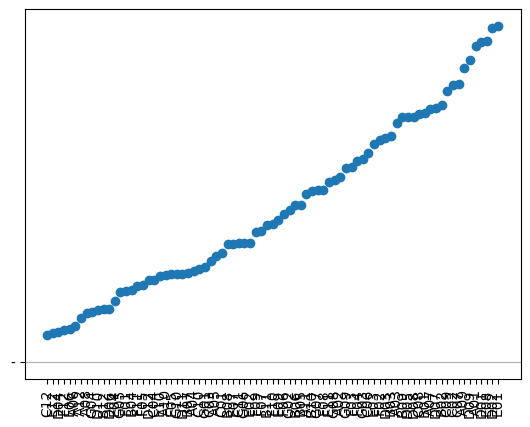

In [60]:
db.plot_species_accum('y')

## PERMANOVA (COMING SOON)

## CO-OCCURENCE NETWORKS (COMING SOON)

### - MODIFY SPECIES ACCUMULATION CURVE
### - INCLUDE PARAMETERS TO CHOOSE WHICH GROUPS WITHIN DATA SHOULD BE INCLUDED IN THE ACCUMULATION CURVE

## Still Working